# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import mpl_toolkits.mplot3d

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import  HouseholdSpecializationModelClass



/Users/juliane/projects-2023-jt-2/inauguralproject/HouseholdSpecializationModel.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha* HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliane/projects-2023-jt-2/inauguralproject/HouseholdSpecializationModel.py:61: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha* HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliane/projects-2023-jt-2/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


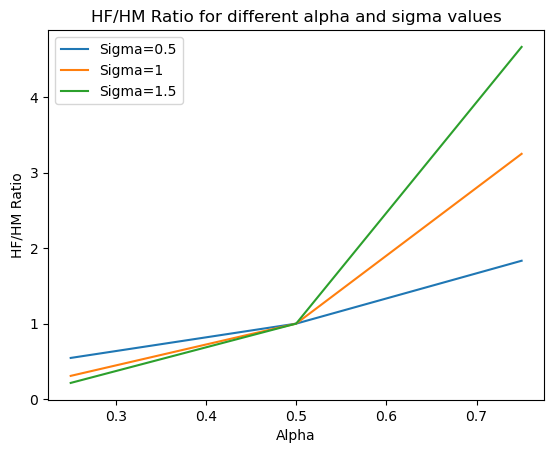

In [3]:
model = HouseholdSpecializationModelClass()

# set values of alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# create empty lists
HM_list = []
HF_list = []

# loop over alpha and sigma values
for alpha in alpha_values:
    for sigma in sigma_values:
        
        # set values of alpha and sigma in model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model discretely
        opt = model.solve_discrete()
        
        # append optimal HM and HF values to lists
        HM_list.append(opt.HM)
        HF_list.append(opt.HF)
        
# print lists of HM and HF values
#print("HM values:", HM_list)
#print("HF values:", HF_list)


# Converting to arrays to use numpy functions
HM_array = np.array(HM_list)
HF_array = np.array(HF_list)

# Finding the ratio
HF_HM_ratio = HF_array / HM_array

# Plotting
#print("HF / HM Ratio", HF_HM_ratio)

# Reshaping the array to a matrix with alpha on the rows and sigma on the columns
HF_HM_matrix = HF_HM_ratio.reshape(len(alpha_values), len(sigma_values))

# Plotting the ratios for the different alphas with sigma as a fixed variable
for i in range(len(sigma_values)):
    plt.plot(alpha_values, HF_HM_matrix[:,i], label='Sigma='+str(sigma_values[i]))

plt.xlabel('Alpha')
plt.ylabel('HF/HM Ratio')
plt.title('HF/HM Ratio for different alpha and sigma values')
plt.legend()
plt.show()



# Question 2

plotting $Wf/Wm$ ratio

9 9


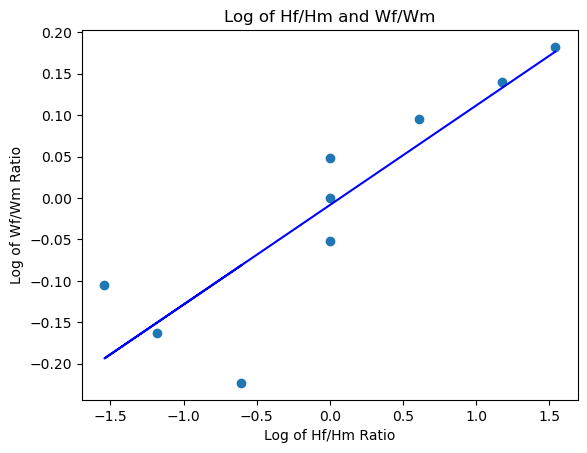

In [4]:
# Create arrays for WF/WM ratio
WFlist = np.linspace(0.8, 1.2, 9)
WM = np.ones(9)
WF = np.array(WFlist)
WF_WM_r = WF / WM

# Take log of values
log_wf_wm_r = np.log(WF_WM_r)
log_hf_hm = np.log(HF_HM_ratio)

# Plot
print(len(log_wf_wm_r), len(log_hf_hm))
plt.scatter(log_hf_hm, log_wf_wm_r)
slope, intercept = np.polyfit(log_hf_hm, log_wf_wm_r, 1)
plt.plot(log_hf_hm, slope * log_hf_hm + intercept, color='blue')
plt.xlabel("Log of Hf/Hm Ratio")
plt.ylabel("Log of Wf/Wm Ratio")
plt.title("Log of Hf/Hm and Wf/Wm")
plt.show()

# Question 3

Plot the $Wf / Wm$ ratio for the continuous values 

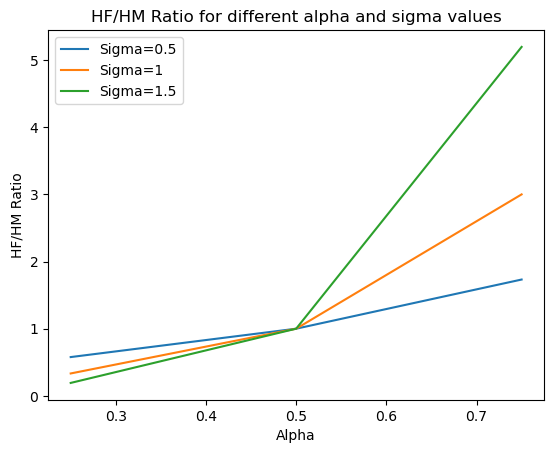

In [5]:
model = HouseholdSpecializationModelClass()

# set values of alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# create empty lists
HM_list1 = []
HF_list1 = []

# loop over alpha and sigma values
for alpha in alpha_values:
    for sigma in sigma_values:
        
        # set values of alpha and sigma in model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model continuously
        opt_c = model.solve()
        
        
        # append optimal HM and HF values to lists
        HM_list1.append(opt_c.HM)
        HF_list1.append(opt_c.HF)
        
# print lists of HM and HF values
#print("HM values:", HM_list)
#print("HF values:", HF_list)

# Converting to arrays to use numpy functions
HM_array1 = np.array(HM_list1)
HF_array1 = np.array(HF_list1)

# Finding the ratio
HF_HM_ratio1 = HF_array1 / HM_array1

# Plotting
#print("HF / HM Ratio", HF_HM_ratio)

# Reshaping the array to a matrix with alpha on the rows and sigma on the columns
HF_HM_matrix1 = HF_HM_ratio1.reshape(len(alpha_values), len(sigma_values))

# Plotting the ratios for the different alphas with sigma as a fixed variable
for i in range(len(sigma_values)):
    plt.plot(alpha_values, HF_HM_matrix1[:,i], label='Sigma='+str(sigma_values[i]))

plt.xlabel('Alpha')
plt.ylabel('HF/HM Ratio')
plt.title('HF/HM Ratio for different alpha and sigma values')
plt.legend()
plt.show()



9 9


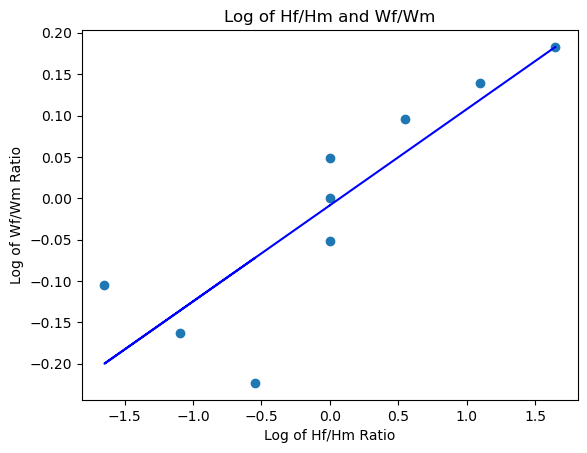

In [7]:
# Create arrays for WF/WM ratio
WFlist = np.linspace(0.8, 1.2, 9)
WM = np.ones(9)
WF = np.array(WFlist)
WF_WM_r = WF / WM

# Take log of values
log_wf_wm_r = np.log(WF_WM_r)
log_hf_hm1 = np.log(HF_HM_ratio1)

# Plot
print(len(log_wf_wm_r), len(log_hf_hm1))
plt.scatter(log_hf_hm1, log_wf_wm_r)
slope, intercept = np.polyfit(log_hf_hm1, log_wf_wm_r, 1)
plt.plot(log_hf_hm1, slope * log_hf_hm1 + intercept, color='blue')
plt.xlabel("Log of Hf/Hm Ratio")
plt.ylabel("Log of Wf/Wm Ratio")
plt.title("Log of Hf/Hm and Wf/Wm")
plt.show()

# Question 4

Choose $\alpha$ and $\sigma$ such that it minimizes the expression. Illustrate how the model fit the data and discuss the economic interpretation of the results.

# Question 5

ADD CONCISE CONLUSION.